<a href="https://colab.research.google.com/github/alihasan72/Cat-Dog-Classification/blob/main/Cat_%26_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification CNN-Keras 

In [ ]:
# Importing Libraries 
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load DataSet
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


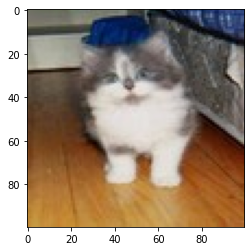

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
# Model Building
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 1s 19ms/step - loss: 4.7133e-04 - accuracy: 1.0000
Epoch 2/10
32/32 [==============================] - 1s 18ms/step - loss: 4.3327e-04 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 1s 18ms/step - loss: 4.0183e-04 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 1s 17ms/step - loss: 3.7821e-04 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 3.5268e-04 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 1s 18ms/step - loss: 3.3065e-04 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 1s 18ms/step - loss: 3.1129e-04 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 1s 18ms/step - loss: 2.8661e-04 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 1s 17ms/step - loss: 2.7736e-04 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 1s 18ms/step - loss:

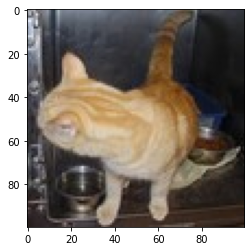

1/1 [==============================] - 0s 17ms/step
Our Model says it is a : Cat


In [ ]:
# Making Predictions
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'Dog'
else:
  pred = 'Cat'

print("Our Model says it is a :",pred)